In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("fraud_data.csv")
df

,TransactionID,Amount,Time,Location,MerchantCategory,CardHolderAge,IsFraud
0,1,375.17,47605,Houston,Travel,18.0,0
1,2,950.76,38088,Los Angeles,Electronics,28.0,0
2,3,732.26,78752,Miami,Travel,20.0,0
3,4,599.06,55284,New York,Groceries,69.0,0
4,5,156.86,57043,New York,Groceries,79.0,0
...,...,...,...,...,...,...,...
495,496,354.00,48770,Houston,Travel,21.0,0
496,497,584.07,78623,Miami,Groceries,64.0,1
497,498,78.66,75629,Miami,Clothing,78.0,0
498,499,974.42,52603,Los Angeles,Electronics,21.0,1


In [3]:
df.head()

,TransactionID,Amount,Time,Location,MerchantCategory,CardHolderAge,IsFraud
0,1,375.17,47605,Houston,Travel,18.0,0
1,2,950.76,38088,Los Angeles,Electronics,28.0,0
2,3,732.26,78752,Miami,Travel,20.0,0
3,4,599.06,55284,New York,Groceries,69.0,0
4,5,156.86,57043,New York,Groceries,79.0,0


In [4]:
df.tail()

,TransactionID,Amount,Time,Location,MerchantCategory,CardHolderAge,IsFraud
495,496,354.00,48770,Houston,Travel,21.0,0
496,497,584.07,78623,Miami,Groceries,64.0,1
497,498,78.66,75629,Miami,Clothing,78.0,0
498,499,974.42,52603,Los Angeles,Electronics,21.0,1
499,500,986.22,81974,Chicago,Electronics,37.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TransactionID     500 non-null    int64  
 1   Amount            475 non-null    float64
 2   Time              500 non-null    int64  
 3   Location          475 non-null    object 
 4   MerchantCategory  500 non-null    object 
 5   CardHolderAge     476 non-null    float64
 6   IsFraud           500 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 27.5+ KB


In [6]:
df.describe()

,TransactionID,Amount,Time,CardHolderAge,IsFraud
count,500.000000,475.000000,500.000000,476.000000,500.000000
mean,250.500000,641.112753,41141.482000,47.518908,0.054000
std,144.481833,1044.448065,25614.468967,18.677362,0.226244
min,1.000000,6.060000,55.000000,5.000000,0.000000
25%,125.750000,243.780000,18726.250000,32.000000,0.000000
50%,250.500000,518.810000,40772.000000,47.000000,0.000000
75%,375.250000,776.000000,63463.250000,63.000000,0.000000
max,500.000000,9691.578643,86066.000000,120.000000,1.000000


In [7]:
df.shape

(500, 7)

In [8]:
df.size

3500

In [9]:
df.columns

Index(['TransactionID', 'Amount', 'Time', 'Location', 'MerchantCategory',
       'CardHolderAge', 'IsFraud'],
      dtype='object')

In [10]:
df.isnull().sum()

TransactionID        0
Amount              25
Time                 0
Location            25
MerchantCategory     0
CardHolderAge       24
IsFraud              0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.drop_duplicates(inplace = True)

In [13]:
df["IsFraud"].value_counts()

IsFraud
0    473
1     27
Name: count, dtype: int64

In [14]:
df.sort_values(["IsFraud","CardHolderAge","Time","Amount"])

,TransactionID,Amount,Time,Location,MerchantCategory,CardHolderAge,IsFraud
358,359,940.29,59201,Chicago,Entertainment,5.0,0
423,424,494.93,68244,Miami,Groceries,5.0,0
206,207,NaN,79905,Chicago,Travel,5.0,0
230,231,795.02,27139,Miami,Electronics,18.0,0
449,450,84.42,37148,Houston,Groceries,18.0,0
...,...,...,...,...,...,...,...
290,291,31.47,235,Chicago,Entertainment,68.0,1
148,149,52.43,18777,Chicago,Groceries,77.0,1
202,203,162.47,82152,Miami,Clothing,120.0,1
293,294,360.83,8567,New York,Clothing,NaN,1


In [15]:
df['Amount'].fillna(df['Amount'].median(), inplace=True)

df['CardHolderAge'].fillna(df['CardHolderAge'].median(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_13792\1453098015.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount'].fillna(df['Amount'].median(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_13792\1453098015.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [16]:
df

,TransactionID,Amount,Time,Location,MerchantCategory,CardHolderAge,IsFraud
0,1,375.17,47605,Houston,Travel,18.0,0
1,2,950.76,38088,Los Angeles,Electronics,28.0,0
2,3,732.26,78752,Miami,Travel,20.0,0
3,4,599.06,55284,New York,Groceries,69.0,0
4,5,156.86,57043,New York,Groceries,79.0,0
...,...,...,...,...,...,...,...
495,496,354.00,48770,Houston,Travel,21.0,0
496,497,584.07,78623,Miami,Groceries,64.0,1
497,498,78.66,75629,Miami,Clothing,78.0,0
498,499,974.42,52603,Los Angeles,Electronics,21.0,1


In [17]:
mode_value = df['Location'].mode()[0]
df['Location'].fillna(mode_value, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_13792\3950567231.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Location'].fillna(mode_value, inplace=True)


In [18]:
df

,TransactionID,Amount,Time,Location,MerchantCategory,CardHolderAge,IsFraud
0,1,375.17,47605,Houston,Travel,18.0,0
1,2,950.76,38088,Los Angeles,Electronics,28.0,0
2,3,732.26,78752,Miami,Travel,20.0,0
3,4,599.06,55284,New York,Groceries,69.0,0
4,5,156.86,57043,New York,Groceries,79.0,0
...,...,...,...,...,...,...,...
495,496,354.00,48770,Houston,Travel,21.0,0
496,497,584.07,78623,Miami,Groceries,64.0,1
497,498,78.66,75629,Miami,Clothing,78.0,0
498,499,974.42,52603,Los Angeles,Electronics,21.0,1


In [19]:
df

,TransactionID,Amount,Time,Location,MerchantCategory,CardHolderAge,IsFraud
0,1,375.17,47605,Houston,Travel,18.0,0
1,2,950.76,38088,Los Angeles,Electronics,28.0,0
2,3,732.26,78752,Miami,Travel,20.0,0
3,4,599.06,55284,New York,Groceries,69.0,0
4,5,156.86,57043,New York,Groceries,79.0,0
...,...,...,...,...,...,...,...
495,496,354.00,48770,Houston,Travel,21.0,0
496,497,584.07,78623,Miami,Groceries,64.0,1
497,498,78.66,75629,Miami,Clothing,78.0,0
498,499,974.42,52603,Los Angeles,Electronics,21.0,1


In [20]:
df.isnull()

,TransactionID,Amount,Time,Location,MerchantCategory,CardHolderAge,IsFraud
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False


In [21]:
df.drop_duplicates(inplace=True)
df

,TransactionID,Amount,Time,Location,MerchantCategory,CardHolderAge,IsFraud
0,1,375.17,47605,Houston,Travel,18.0,0
1,2,950.76,38088,Los Angeles,Electronics,28.0,0
2,3,732.26,78752,Miami,Travel,20.0,0
3,4,599.06,55284,New York,Groceries,69.0,0
4,5,156.86,57043,New York,Groceries,79.0,0
...,...,...,...,...,...,...,...
495,496,354.00,48770,Houston,Travel,21.0,0
496,497,584.07,78623,Miami,Groceries,64.0,1
497,498,78.66,75629,Miami,Clothing,78.0,0
498,499,974.42,52603,Los Angeles,Electronics,21.0,1


In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
df['MerchantCategory'] = le.fit_transform(df['MerchantCategory'])
# Agar Merchant column bhi categorical hai toh usme bhi same


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Amount','CardHolderAge','Time']] = scaler.fit_transform(df[['Amount','CardHolderAge','Time']])


In [24]:
from sklearn.model_selection import train_test_split

X = df.drop("IsFraud", axis=1)
y = df["IsFraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


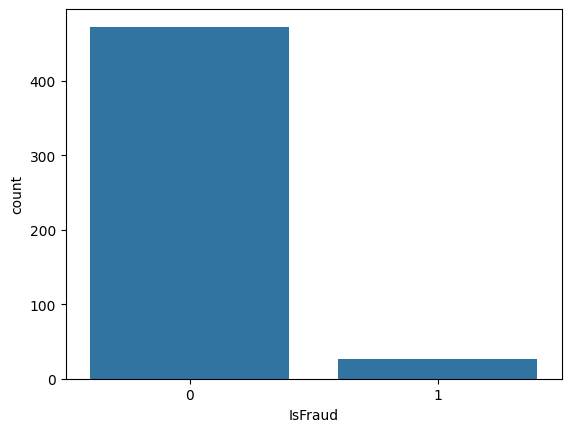

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="IsFraud", data=df)
plt.show()


In [26]:
from sklearn.linear_model import LogisticRegression

# Model
lr_model = LogisticRegression(class_weight='balanced', random_state=42)
lr_model.fit(X_train, y_train)

# Prediction
y_pred = lr_model.predict(X_test)
y_proba = lr_model.predict_proba(X_test)[:,1]  # probability of fraud


In [27]:
from sklearn.metrics import classification_report, roc_auc_score

print("Logistic Regression:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.97      0.61      0.75        95
           1       0.07      0.60      0.13         5

    accuracy                           0.61       100
   macro avg       0.52      0.61      0.44       100
weighted avg       0.92      0.61      0.72       100

ROC-AUC: 0.56


In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [29]:
from sklearn.metrics import classification_report, roc_auc_score



print("Random Forest:\n", classification_report(y_test, y_pred_rf))


Random Forest:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        95
           1       0.00      0.00      0.00         5

    accuracy                           0.95       100
   macro avg       0.47      0.50      0.49       100
weighted avg       0.90      0.95      0.93       100



c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f



## Conclusion :

- Logistic Regression is recommended for this fraud detection project. It provides reliable performance for fraud detection, is simple, interpretable, and handles the imbalanced dataset effectively.

- Random Forest, while powerful, does not give significant improvement and adds unnecessary complexity and risk of overfitting in this scenario.
